In [1]:
import fiona
import pylab
import numpy as np
import pandas as pd
from osgeo import gdal, gdalnumeric, ogr, osr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os,sys
gdal.UseExceptions()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#Open the dataset
srcImage = gdal.Open('../calc/historical/mean_sa_2330_11_19792014.tif')
banda = srcImage.GetRasterBand(1)
dati = gdalnumeric.BandReadAsArray(banda)

In [4]:
geoTrans = srcImage.GetGeoTransform()

In [ ]:
map = Basemap(projection='tmerc', 
              lat_0=0, lon_0=3,
              llcrnrlon=267, 
              llcrnrlat=-27.6875305, 
              urcrnrlon=305, 
              urcrnrlat=13.5625)

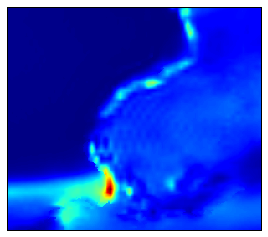

In [13]:
from numpy import linspace
from numpy import meshgrid
x = linspace(0, map.urcrnrx, dati.shape[1])
y = linspace(0, map.urcrnry, dati.shape[0])
xx, yy = meshgrid(x, y)
map.pcolormesh(xx, yy, dati)
plt.show()

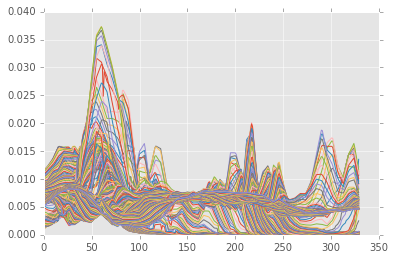

In [15]:
plt.plot(dati)
plt.show()

In [8]:
df_mean = pd.DataFrame(dati)

In [11]:
df_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,0.002441,0.002451,0.002459,0.002467,0.002475,0.002483,0.002462,0.002361,0.002260,0.002159,...,0.005368,0.005359,0.005350,0.005341,0.005332,0.005307,0.005279,0.005250,0.005221,0.005192
1,0.002712,0.002710,0.002704,0.002698,0.002692,0.002686,0.002654,0.002548,0.002441,0.002335,...,0.005494,0.005481,0.005469,0.005456,0.005443,0.005420,0.005394,0.005367,0.005341,0.005315
2,0.002983,0.002969,0.002949,0.002929,0.002910,0.002890,0.002846,0.002734,0.002623,0.002511,...,0.005620,0.005603,0.005587,0.005571,0.005555,0.005533,0.005509,0.005485,0.005462,0.005438
3,0.003254,0.003228,0.003194,0.003161,0.003127,0.003094,0.003038,0.002921,0.002804,0.002687,...,0.005745,0.005726,0.005706,0.005686,0.005667,0.005646,0.005624,0.005603,0.005582,0.005561
4,0.003525,0.003487,0.003440,0.003392,0.003345,0.003297,0.003230,0.003108,0.002985,0.002863,...,0.005871,0.005848,0.005825,0.005801,0.005778,0.005758,0.005740,0.005721,0.005702,0.005684


In [12]:
df_mean.describe()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,0.002068,0.002069,0.002069,0.002070,0.002070,0.002071,0.002071,0.002069,0.002067,0.002066,...,0.005334,0.005339,0.005336,0.005348,0.005354,0.005364,0.005375,0.005385,0.005398,0.005411
std,0.003288,0.003289,0.003290,0.003292,0.003294,0.003295,0.003295,0.003289,0.003283,0.003277,...,0.001876,0.001898,0.001924,0.001944,0.001968,0.001993,0.002019,0.002046,0.002072,0.002098
min,0.000202,0.000203,0.000205,0.000205,0.000202,0.000200,0.000200,0.000204,0.000209,0.000214,...,0.001705,0.001665,0.001620,0.001582,0.001544,0.001512,0.001480,0.001445,0.001410,0.001373
25%,0.000317,0.000318,0.000318,0.000318,0.000318,0.000316,0.000315,0.000315,0.000313,0.000311,...,0.004300,0.004303,0.004175,0.004230,0.004185,0.004122,0.004092,0.004070,0.004062,0.004039
50%,0.000489,0.000488,0.000487,0.000486,0.000481,0.000475,0.000474,0.000475,0.000475,0.000472,...,0.005602,0.005598,0.005591,0.005609,0.005622,0.005650,0.005670,0.005693,0.005709,0.005756
75%,0.001449,0.001469,0.001489,0.001509,0.001529,0.001549,0.001570,0.001592,0.001614,0.001636,...,0.007029,0.007051,0.007069,0.007099,0.007118,0.007193,0.007285,0.007355,0.007410,0.007470
max,0.012808,0.012820,0.012835,0.012850,0.012865,0.012880,0.012870,0.012791,0.012712,0.012634,...,0.008261,0.008254,0.008247,0.008241,0.008234,0.008223,0.008226,0.008229,0.008232,0.008236


In [36]:
import seaborn as sns
sns.set(color_codes=True)